# Segmentation_EMStack_AutoEncoderArchitecture#
### In this example, the Autoencoder architecture used in the high compression test is being repurposed for segmentation.
#### Network ####
Conv (3x3) -
Maxp -
Conv (3x3) -
Maxp -
Flatten -
TransposedConv(3x3) -
TransposedConv(3x3)
#### Note ####
Not always converges to a nice solution

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import numpy as np
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.3
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb

In [3]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage import io
imTrain = io.imread(os.getcwd() + '/data/train-volume.tif')
NumImages = 30;
ImageDim = 512 * 512
imsTrain = np.reshape(imTrain, (NumImages, ImageDim)).transpose() 
imsTrain = imsTrain.astype(np.double)/255

imTest = io.imread(os.getcwd() + '/data/test-volume.tif')
imsTest = np.reshape(imTest, (NumImages, ImageDim)).transpose() 
imsTest = imsTest.astype(np.double)/255

lbTrain = io.imread(os.getcwd() + '/data/train-labels.tif')
lbsTrain = np.reshape(lbTrain, (NumImages, ImageDim)).transpose()
enc = OneHotEncoder(categories='auto')
enc.fit(lbsTrain.reshape(-1, 1))
lbsTrainOneHot = np.zeros((ImageDim,NumImages * 2))
for idx in range(0,NumImages):
    lbsTrainOneHot[:,2*idx:(2*idx +2)] = enc.transform(lbsTrain[:,idx].reshape(-1, 1)).toarray()

In [4]:
print("Values per Image:", imsTrain.shape[0])
print("Number of images for training:", imsTrain.shape[1])

print("Values per  Label Image:", lbsTrainOneHot.shape[0])
print("Number of images for Label training:", lbsTrainOneHot.shape[1])
plt.ion()
inputVar = 30 # change to visualize
while inputVar < 30:
    f = plt.figure(figsize=(20,5))
    f.suptitle('Original image and One Hot Labels', fontsize=16)
    plt.subplot(131)
    plt.imshow(np.reshape(imsTrain[:,inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(132)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(133)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar + 1],(512,512)), interpolation='nearest', cmap='gray')
    plt.show()
    inputVar = int(input("Next Index? (Press 30 or larger escape)."))# wait for input from the user

Values per Image: 262144
Number of images for training: 30
Values per  Label Image: 262144
Number of images for Label training: 60


In [5]:
labelDepth = 2
convolutionDepth = 64
segSimple = pyb.SegmentationExample6(512,512,1,labelDepth)

Conv In Depth: 1 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 512 Out Width: 512
Maxp In Depth: 16 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 256 Out Width: 256
Conv In Depth: 16 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 256 Out Width: 256
Maxp In Depth: 32 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 128 Out Width: 128
Tran In Depth: 32 In Height: 128 In Width: 128 Out Depth: 16 Out Height: 256 Out Width: 256
Tran In Depth: 16 In Height: 256 In Width: 256 Out Depth: 2 Out Height: 512 Out Width: 512


In [6]:
segSimple.Train(imsTrain,lbsTrainOneHot,0.000001,8)

Loss of a given sample at epoch: 0
44950.3
Loss of a given sample at epoch: 1
41392.7
Loss of a given sample at epoch: 2
40259.7
Loss of a given sample at epoch: 3
33101.3
Loss of a given sample at epoch: 4
35065.1
Loss of a given sample at epoch: 5
31750.4
Loss of a given sample at epoch: 6
32962.3
Loss of a given sample at epoch: 7
31892.2


testing:


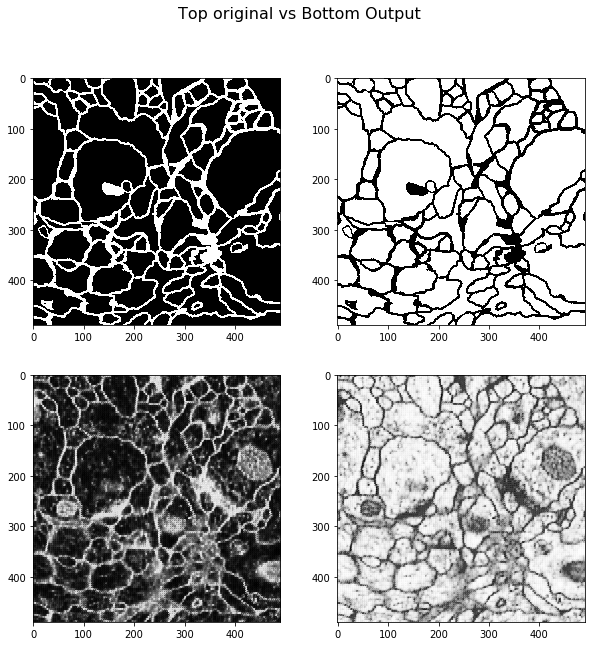

In [7]:
# Since the testing labels are not provided, here I check one of the training images.
segSimpleOut = segSimple.Test(imsTrain[:,0])

f = plt.figure(figsize=(10,10))
f.suptitle('Top original vs Bottom Output', fontsize=16)
plt.subplot(221)
plt.imshow(np.reshape(lbsTrainOneHot[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(222)
plt.imshow(np.reshape(lbsTrainOneHot[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(223)
plt.imshow(np.reshape(segSimpleOut[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(224)
plt.imshow(np.reshape(segSimpleOut[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.show()

testing:


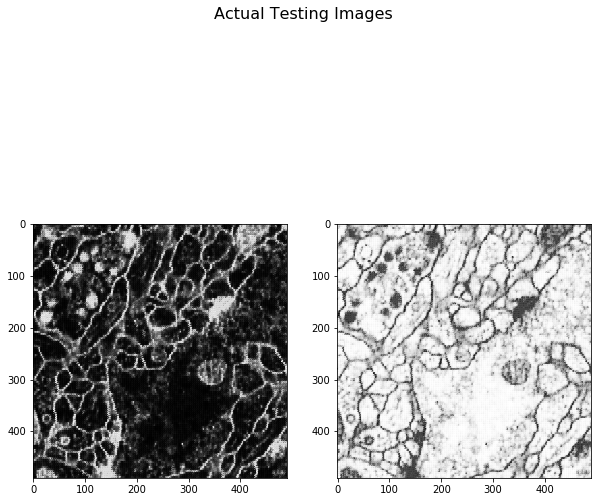

In [8]:
segSimpleOut = segSimple.Test(imsTest[:,0])

f = plt.figure(figsize=(10,10))
f.suptitle('Actual Testing Images', fontsize=16)
plt.subplot(121)
plt.imshow(np.reshape(segSimpleOut[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(segSimpleOut[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.show()

In [9]:
segSimpleOut.tolist()

[[0.016391319944985418, 0.9918267285383136],
 [0.02958552361227565, 0.9577908542426496],
 [0.009420751065146993, 0.9880665134145041],
 [0.024668260619700275, 0.9663342542941185],
 [0.04486654380416108, 0.9751136020895524],
 [0.05233376195273542, 0.9490911532413003],
 [0.015182950029129222, 0.9682265483493138],
 [0.048410250635597715, 0.9663039448210621],
 [0.028842709915064393, 0.9843916060686384],
 [0.038718900330141345, 0.9660418230658211],
 [0.00931262405481305, 0.9803833066438336],
 [0.03134063220923086, 0.9774138443876192],
 [0.018816082452965444, 0.9912524097190207],
 [0.026004593414031073, 0.9772903958138353],
 [0.005734519409733908, 0.9880465502137293],
 [0.02082265788071123, 0.9851448893291521],
 [0.01970750693747788, 0.9920240019761767],
 [0.026706869569371624, 0.9766787144936007],
 [0.00773171168375162, 0.9845829984426265],
 [0.03111148961342818, 0.9789500239680929],
 [0.018720681876011648, 0.9943615098938086],
 [0.026532005593514096, 0.9723401155581026],
 [0.017638784931462